In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import*
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [2]:
data=pd.read_csv(r"C:\Users\saiku\OneDrive\Desktop\OIBSIP\Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data=data.drop(columns=["Id"])

# Checking missing values

In [6]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
species=data['Species'].value_counts()
species

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
types=data["Species"].unique()
types

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Data Visualization

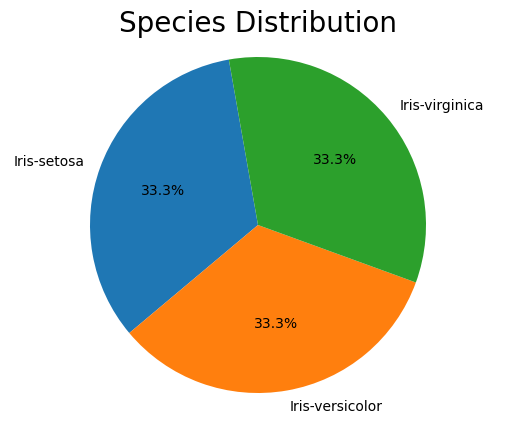

In [10]:
plt.pie(species, labels = types, autopct = '%2.1f%%', startangle = 100)
plt.axis('equal')
plt.title('Species Distribution', fontsize = 20)
plt.show()

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

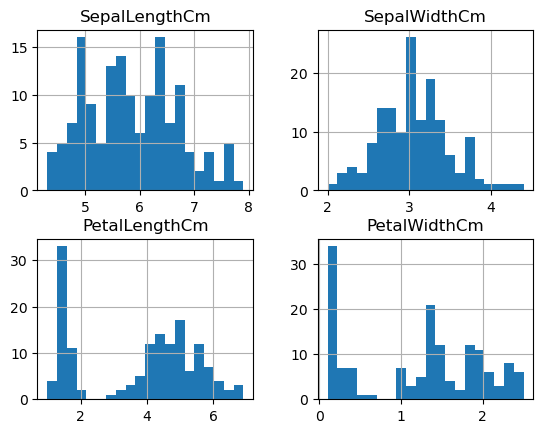

In [11]:
data.hist(bins=20)

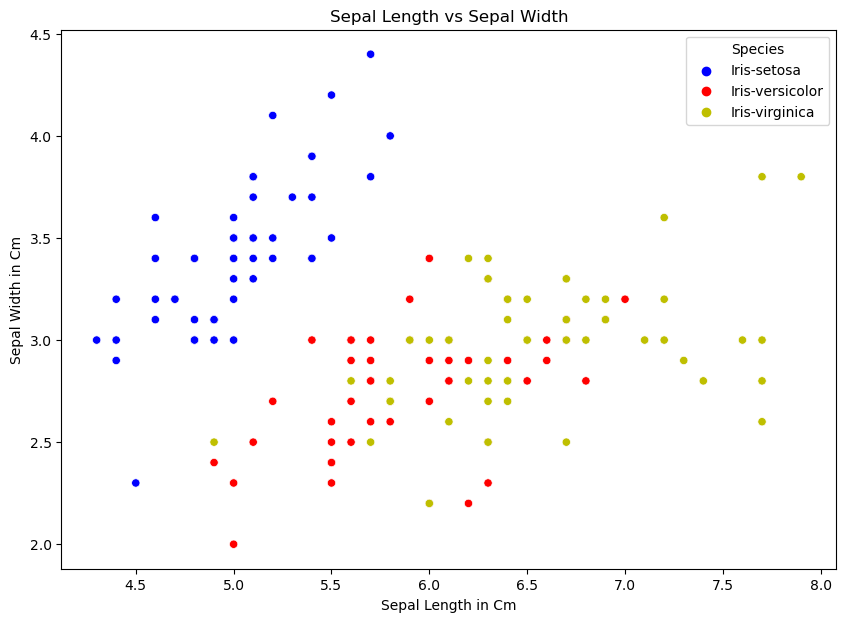

In [12]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette=['b', 'r', 'y'])
plt.xlabel('Sepal Length in Cm')
plt.ylabel('Sepal Width in Cm')
plt.title('Sepal Length vs Sepal Width')
plt.show()

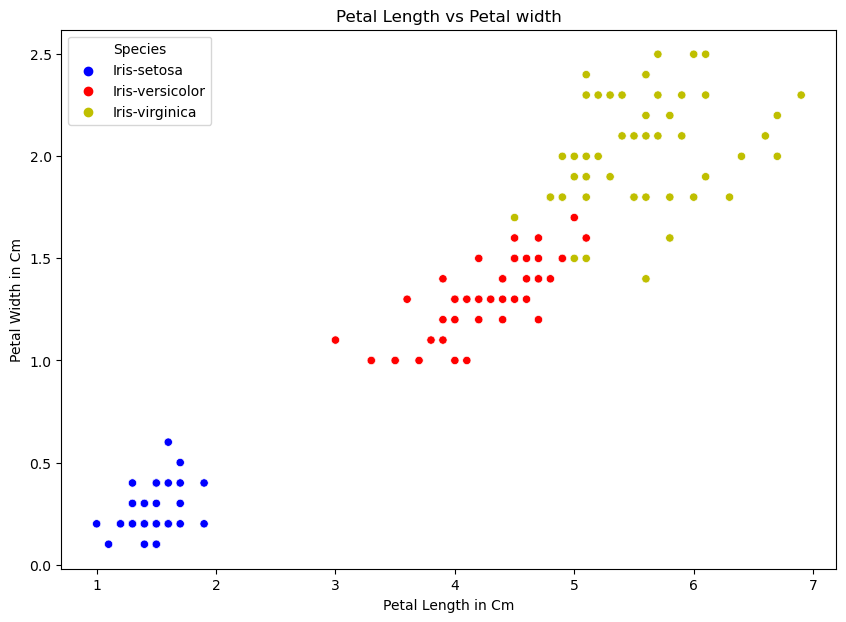

In [13]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data, x='PetalLengthCm', y='PetalWidthCm', hue='Species', palette=['b', 'r', 'y'])
plt.xlabel('Petal Length in Cm')
plt.ylabel('Petal Width in Cm')
plt.title('Petal Length vs Petal width')
plt.show()

# Correlation between different features

In [14]:
data.corr()

C:\Users\saiku\AppData\Local\Temp\ipykernel_22164\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


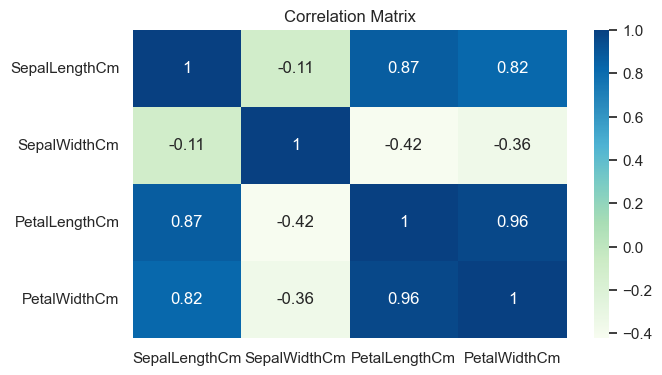

In [15]:
plt.figure(figsize=(7, 4))
sns.set(style="whitegrid") 

corr_matrix = data.corr(numeric_only=True)  # Compute the correlation matrix

sns.heatmap(corr_matrix, annot=True, cmap='GnBu')

plt.title("Correlation Matrix")
plt.show()

In [16]:
data.shape

(150, 5)

In [19]:
x=data.iloc[:,:-1]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
y=data.iloc[:,-1]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)

# Model Building

In [21]:
model = LogisticRegression(max_iter = 1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [22]:
predictions = model.predict(x_test)
print(classification_report(y_test, predictions))
print("Confusion Matrix\n", confusion_matrix(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Confusion Matrix
 [[15  0  0]
 [ 0 15  1]
 [ 0  0 14]]


In [23]:
accuracy = accuracy_score(y_test,predictions)*100
print(f"Accuracy:",accuracy)

Accuracy: 97.77777777777777


# KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=4)
model2.fit(x_train,y_train)
KNN_accuracy = model2.score(x_test,y_test)*100
print("Accuracy using KNN model: ",KNN_accuracy)

Accuracy using KNN model:  95.55555555555556


In [28]:
from sklearn.preprocessing import StandardScaler

In [26]:
new_data = pd.DataFrame({
    'SepalLengthCm': [5.3],
    'SepalWidthCm': [4.9],
    'PetalLengthCm': [5.6],
    'PetalWidthCm': [3.4]
})

scaler = StandardScaler()
scaled_new_data = scaler.fit_transform(new_data)

predicted_species = model.predict(scaled_new_data)

print(predicted_species)

['Iris-setosa']


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
